In [1]:
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

from scipy.stats import skew, kurtosis, norminvgauss, norm
from scipy.stats import hypsecant

In [2]:
day_return = pd.read_csv('DATA/EURUSD_Day_RETURN_05.05.2003-29.04.2020.csv')
# hour_return = pd.read_csv('DATA/EURUSD_Hour_RETURN_05.05.2003-29.04.2020.csv')
# minute_return = pd.read_csv('DATA/EURUSD_Minute_RETURN_29.04.2019-29.04.2020.csv')

NameError: name 'x' is not defined

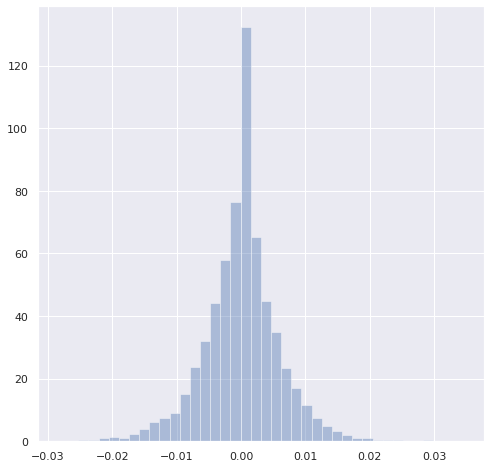

In [3]:
plt.figure(figsize=(8,8))
sns.set()

sns.distplot(day_return, bins=40, label='EUR/USD returns daily hist', kde=False, norm_hist=True)
plt.plot(x, NORM_rv_1.pdf(x), label='normal distribution', linewidth=1)

plt.axis([-0.04, 0.04, 0.0, 140])
plt.legend()

plt.show()

In [4]:
def non_normal_dist(returns, returns_label):
    
    loc_norm, scale_norm = norm.fit(returns)
    norm_rv = norm(loc_norm, scale_norm)
    norm_data = norm_rv.rvs(size=1000)
    print(f'params for normal dist:\n \nloc = {loc_norm}\nscale = {scale_norm}')
    
    plt.figure(figsize=(8,8))
    plt.yscale('log')

    sns.kdeplot(data=returns.iloc[:, 0], label=returns_label, shade=True)
    sns.kdeplot(norm_data, label='Normal distribution', shade=True)
    plt.legend()

    plt.show()

params for normal dist:
 
loc = -8.702872069763842e-06
scale = 0.005916906906870084


/home/dimitry/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)
/home/dimitry/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)


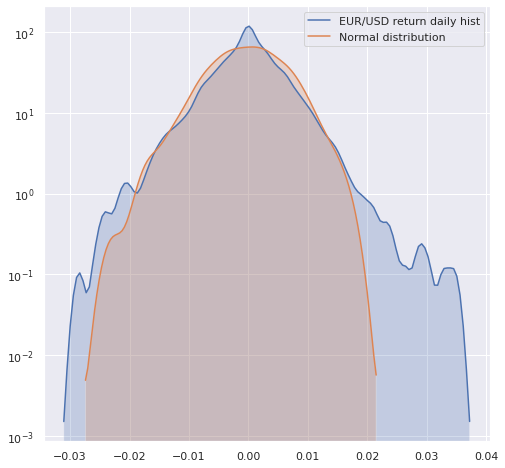

In [5]:
non_normal_dist(day_return, 'EUR/USD return daily hist')

In [7]:
day_return_hist = np.histogram(day_return ,bins = 50)
NORM_rv_1 = norm(-8.702872069763842e-06, 0.005916906906870084)
#x = np.linspace(-0.04, 0.04, 1000)
norm_data = NORM_rv_1.rvs(size=4999)

NORM_rv_1_hist = np.histogram(norm_data ,bins = 50)

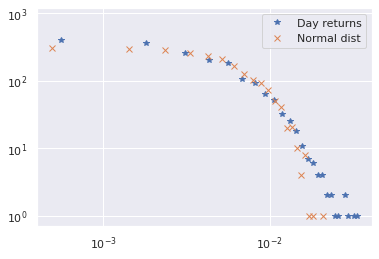

In [8]:
plt.yscale('log')
plt.xscale('log')
plt.plot(day_return_hist[1][:-1],day_return_hist[0],'*', label='Day returns')
plt.plot(NORM_rv_1_hist[1][:-1],NORM_rv_1_hist[0],'x', label='Normal dist')
plt.legend()
plt.show()

NameError: name 'x' is not defined

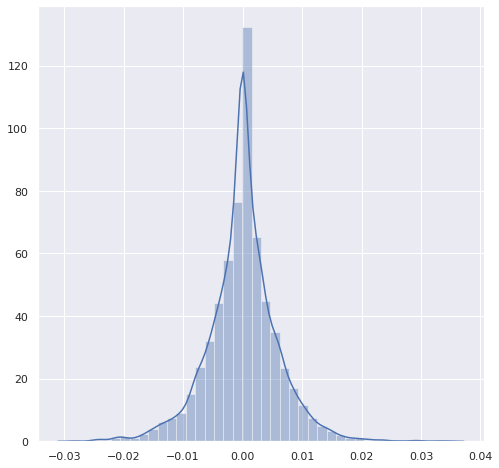

In [9]:
plt.figure(figsize=(8,8))
sns.set()

sns.distplot(day_return, bins=40, label='EUR/USD returns daily hist', kde=True, norm_hist=True)
plt.plot(x, NORM_rv_1.pdf(x), label='normal distribution', linewidth=3)

plt.axis([-0.03, -0.02, 0.0, 4])
plt.legend()

plt.show()

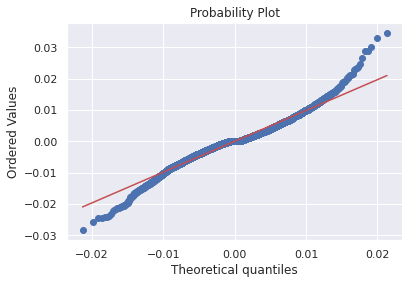

In [10]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(day_return.iloc[:, 0], dist=norm(-8.702872069763842e-06, 0.005916906906870084), plot=pylab)
pylab.show()

In [11]:
actual_data_sorted = day_return.iloc[:, 0].sort_values().reset_index(drop=True)
print(f'left tail:\n{actual_data_sorted[:9]}')
print('___________________________')
print(f'right tail:\n{actual_data_sorted[-9:]}')

left tail:
0   -0.028472
1   -0.025679
2   -0.024447
3   -0.024351
4   -0.024183
5   -0.024163
6   -0.023719
7   -0.023141
8   -0.022356
Name: Close, dtype: float64
___________________________
right tail:
4423    0.023434
4424    0.023641
4425    0.024653
4426    0.026463
4427    0.028763
4428    0.028859
4429    0.030208
4430    0.032794
4431    0.034627
Name: Close, dtype: float64


NameError: name 'x' is not defined

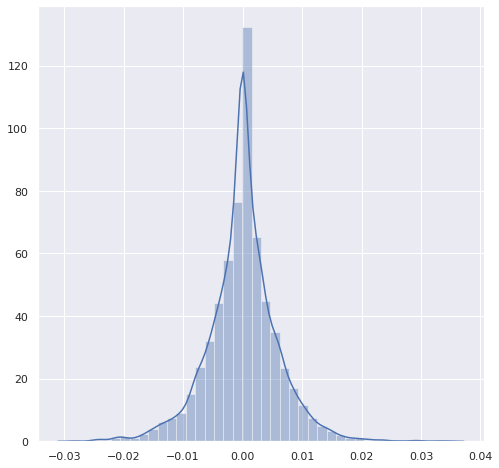

In [12]:
plt.figure(figsize=(8,8))
sns.set()

sns.distplot(day_return, bins=40, label='EUR/USD returns daily hist', kde=True, norm_hist=True)
plt.plot(x, NORM_rv_1.pdf(x), label='normal distribution', linewidth=3)
plt.plot([actual_data_sorted[9], actual_data_sorted[9]], [0.08, 0.83], '.', linewidth=1, c='black')
plt.axis([-0.03, -0.02, 0.0, 4])
plt.legend()

plt.show()

In [13]:
norm_left_tail = round(NORM_rv_1.cdf(-0.022356), 7)
print(f'Normal dist case:\n{norm_left_tail} - the probability that return will take a value less than or equal to -0.022356.')
print(f'once every {1 / norm_left_tail} days or once every {round(1 / norm_left_tail / 365, 2)} year')

Normal dist case:
7.94e-05 - the probability that return will take a value less than or equal to -0.022356.
once every 12594.458438287153 days or once every 34.51 year


In [14]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

In [15]:
actual_left_tail = round(ecdf(actual_data_sorted)[1][8], 7)
print(f'Actual dist case:\n{actual_left_tail} - the probability that return will take a value less than or equal to -0.022356.')
print(f'once every {1 / actual_left_tail} days or once every {round(1 / actual_left_tail / 365, 2)} year')

Actual dist case:
0.0020307 - the probability that return will take a value less than or equal to -0.022356.
once every 492.4410301866352 days or once every 1.35 year


In [16]:
table_1_dict = {'Данные': ['Нормальное распределение', 'Эмпирическое распределение'],
                'Значение функции распределения': [7.94e-05, 0.00203],
                'Частота события': ['раз в 34.5 года', 'раз в 1.35 года']}
Table_1 = pd.DataFrame(table_1_dict)

In [17]:
Table_1

,Данные,Значение функции распределения,Частота события
0,Нормальное распределение,0.000079,раз в 34.5 года
1,Эмпирическое распределение,0.002030,раз в 1.35 года


Таким образом имеем следующую ситуацию:
- Если предполагать, что данные логарифмической доходности валютного курса EUR\USD распределены нормально с выборочными loc = -8.702872069763842e-06 и scale = 0.005916906906870084, то изменение цены на величичну от -0.022356 и  до -inf наступает, приблизительно, **раз в 34.5 года**
- Если рассматривать эмпирическое распределение, то изменение цены на величину от -0.022356 и  до -inf наступает, приблизительно, **раз в 1.35 года** 

In [31]:
'''norminvgauss'''
a, b, loc, scale = norminvgauss.fit(day_return.iloc[:,0])
x = np.linspace(-0.0002, 0.0002, 1000)
NIG = norminvgauss(a, b, loc, scale)
NIG_sample = NIG.rvs(size=4000)
print(f'params for NIG dist:\n \na = {a}\nb = {b}\nloc = {loc}\nscale = {scale}')

params for NIG dist:
 
a = 0.58680724766606
b = -0.019249083287856603
loc = 0.00014336680072544843
scale = 0.004634865540303689


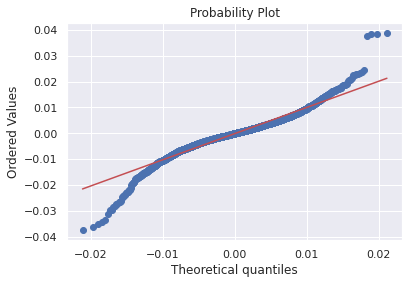

In [33]:
stats.probplot(NIG_sample, dist=norm(-8.702872069763842e-06, 0.005916906906870084), plot=pylab)
pylab.show()

In [29]:
HS_loc_1, HS_scale_1 = hypsecant.fit(day_return.iloc[:,0])
HYP = hypsecant(HS_loc_1, HS_scale_1)
HYP_sample = HYP.rvs(size=4000)

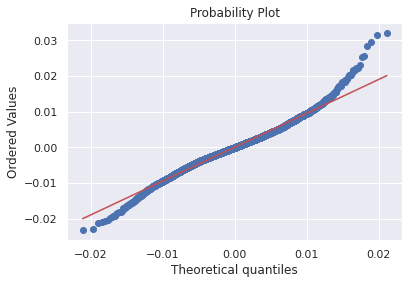

In [34]:
stats.probplot(HYP_sample, dist=norm(-8.702872069763842e-06, 0.005916906906870084),  plot=pylab)
pylab.show()

In [229]:
norm_day_returns = norm(-8.702872069763842e-06, 0.005916906906870084)
# умножаем на 2, чтобы учесть значения лежащие на правом хвосте
theoretical_z_score = norm_day_returns.interval(1 - (0.00203 * 2))[0]
print(f'Theoretical z-score: {theoretical_z_score}')

Theoretical z-score: -0.01701070964245816


In [314]:
norm_day_returns = norm(-8.702872069763842e-06, 0.005916906906870084)
# умножаем на 2, чтобы учесть значения лежащие на правом хвосте
theoretical_z_score = (actual_data_sorted[9] -(-8.702872069763842e-06)) / 0.005916906906870084

print(f'Theoretical z-score: {theoretical_z_score}')

Theoretical z-score: -3.725556110909665


In [316]:
-8.702872069763842e-06 -3.725556110909665 * 0.005916906906870084

-0.00010935365744398605

In [317]:
actual_data_sorted.mean() - actual_z_score * actual_data_sorted.std()

0.022035065812503696

In [313]:
norm_day_returns.cdf(-0.022356)

7.94106891586376e-05

In [196]:
prob_left = norm_day_returns.cdf(theoretical_z_score)
print(f'Proba to left: {round(prob_left, 5)}')

Proba to left: 0.00203


In [274]:
actual_data_sorted = day_return.iloc[:, 0].sort_values().reset_index(drop=True)
print(f'left tail:\n{actual_data_sorted[:9]}')
actual_z_score = (actual_data_sorted[9] - actual_data_sorted.mean()) / actual_data_sorted.std()
print(f'Actual z-score: {round(actual_z_score, 5)}')

left tail:
0   -0.028472
1   -0.025679
2   -0.024447
3   -0.024351
4   -0.024183
5   -0.024163
6   -0.023719
7   -0.023141
8   -0.022356
Name: Close, dtype: float64
Actual z-score: -3.72514


In [234]:
print(f'Norm\nonce every {1 / 0.00203} days or once every {round(1 / 0.00203 / 365, 2)} year')

Norm
once every 492.61083743842363 days or once every 1.35 year


In [295]:
actual_z_score * actual_data_sorted.std()

-0.022043768684573452

In [298]:
prob_left = norm_day_returns.cdf(actual_z_score * actual_data_sorted.std())
print(f'Proba to left: {prob_left}') #9.80123368406915e-05

Proba to left: 9.80123368406915e-05


In [299]:
print(f'Actualy\nonce every {1 / prob_left} days or once every {round(1 / prob_left / 365, 2)} year')

Actualy
once every 10202.797241998142 days or once every 27.95 year


In [296]:
act_z_score = norm_day_returns.interval(1 - (9.80123368406915e-05)*2)[0]
print(f'Theoretical z-score: {act_z_score}')

Theoretical z-score: -0.02204376868457329


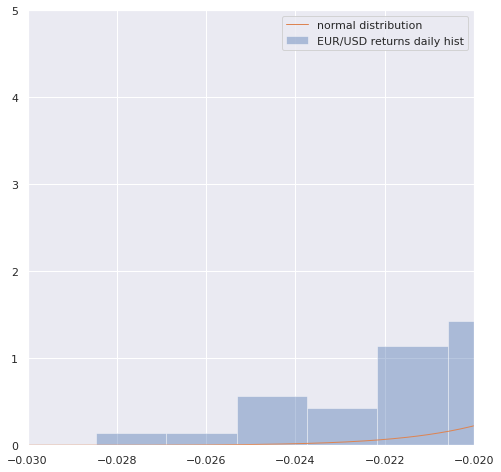

In [326]:
plt.figure(figsize=(8,8))
sns.set()

sns.distplot(day_return, bins=40, label='EUR/USD returns daily hist', kde=False, norm_hist=True)
plt.plot(x, NORM_rv_1.pdf(x), label='normal distribution', linewidth=1)

plt.axis([-0.03, -0.02, 0.0, 5])
plt.legend()

plt.show()

params for normal dist:
 
loc = -3.21676121588259e-07
scale = 0.0012052616109232443


/home/dimitry/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)
/home/dimitry/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)


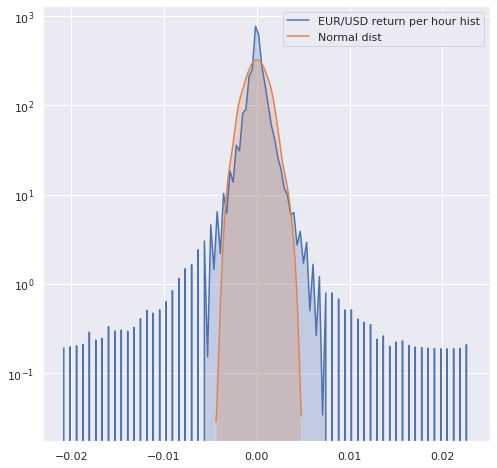

In [165]:
non_normal_dist(hour_return, 'EUR/USD return per hour hist')

params for normal dist:
 
loc = -7.240876458870962e-08
scale = 0.00012027759230754551


/home/dimitry/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)
/home/dimitry/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)


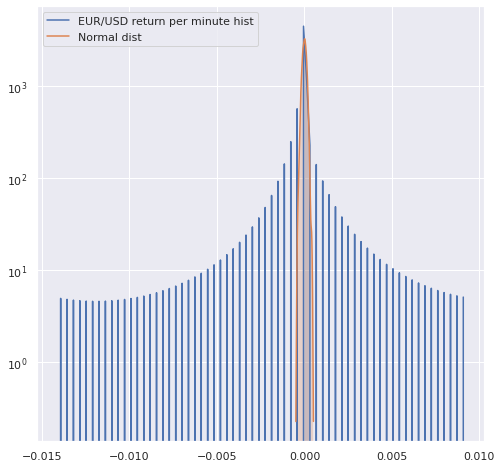

In [166]:
non_normal_dist(minute_return, 'EUR/USD return per minute hist')